Examine distribution in gene expression of reported syncytiotrophoblast and extravillous trophoblast signatures from supplementary figure 3D of Tsang et al in placental datasets from Vento Tormo et al (Tiechmann in code) and Suryawanshi et al (Hemant in code).

I used a text extractor online to extract the genes from the signatures and manually verified they were identical to the genes in the heat map in supp fig 3D, where the column side color correponds to the cell cluster coloring in supp fig 3B. the row side color indicates the cell-type specifiity of the gene

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style = "whitegrid", palette="pastel", color_codes=True)



import mygene


import os

from sklearn.metrics.pairwise import cosine_similarity


In [4]:
# import single cell datasets from the two atlases respectively and do log CPM normalization

placentaHemant = sc.read_h5ad("/Users/kayaneh/documents/deconvolution/livertox/placenta-hemant.h5ad")

placentaTiechmann = sc.read_h5ad("/Users/kayaneh/documents/deconvolution/livertox/placenta-tiechmann.h5ad")


sc.pp.normalize_total(placentaHemant, target_sum = 1e4)
sc.pp.log1p(placentaHemant)

sc.pp.normalize_total(placentaTiechmann, target_sum = 1e4)
sc.pp.log1p(placentaTiechmann)

In [5]:
ensgRef = pd.read_csv("~/Documents/quake/ref/ensg-transcript_biotype.txt", sep = "\t", index_col = 0)

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
evtSig = "COL17A1 MMP11 GDPD3 SLC6A2 UPK1B PAPPA2 INHA AIF1L EGLN3 IL18BP ITGA5 CLDN19 RRAD CERCAM LAIR2 LY6D LVRN PYCR1 NOTUM HLA-G RP5-1091E12.1 AF127936.7 BCAR4"
evtSig = evtSig.split(" ")
evtSig

['COL17A1',
 'MMP11',
 'GDPD3',
 'SLC6A2',
 'UPK1B',
 'PAPPA2',
 'INHA',
 'AIF1L',
 'EGLN3',
 'IL18BP',
 'ITGA5',
 'CLDN19',
 'RRAD',
 'CERCAM',
 'LAIR2',
 'LY6D',
 'LVRN',
 'PYCR1',
 'NOTUM',
 'HLA-G',
 'RP5-1091E12.1',
 'AF127936.7',
 'BCAR4']

In [7]:
sctSig = "LGALS14 DEPDC1B FAR2 PTPN21 RHOBTB1 ARG2 LGALS13 KMO GH2 CYP19A1 TACC2 ATP10D SLC13A4 MUC15 KISS1 PSG6 PSG9 SERPINB2 CSHL1 CSH2 PSG3 PSG1 PSG11 PSG4 ERVFRD-1 LGALS16 RP11-266L9.2"
sctSig = sctSig.split(" ")
sctSig

['LGALS14',
 'DEPDC1B',
 'FAR2',
 'PTPN21',
 'RHOBTB1',
 'ARG2',
 'LGALS13',
 'KMO',
 'GH2',
 'CYP19A1',
 'TACC2',
 'ATP10D',
 'SLC13A4',
 'MUC15',
 'KISS1',
 'PSG6',
 'PSG9',
 'SERPINB2',
 'CSHL1',
 'CSH2',
 'PSG3',
 'PSG1',
 'PSG11',
 'PSG4',
 'ERVFRD-1',
 'LGALS16',
 'RP11-266L9.2']

In [8]:
"""# extract gene synonyms 
evtSigSynon = np.unique(ensgRef[ensgRef["Gene name"].isin(evtSig)]["Gene Synonym"].tolist()).tolist()
evtSigNames = ensgRef[ensgRef["Gene Synonym"].isin(evtSig)]["Gene name"].tolist() # no synonyms present


evtSig += evtSigSynon
evtSig += evtSigNames"""

'# extract gene synonyms \nevtSigSynon = np.unique(ensgRef[ensgRef["Gene name"].isin(evtSig)]["Gene Synonym"].tolist()).tolist()\nevtSigNames = ensgRef[ensgRef["Gene Synonym"].isin(evtSig)]["Gene name"].tolist() # no synonyms present\n\n\nevtSig += evtSigSynon\nevtSig += evtSigNames'

In [9]:
# extract gene synonyms
#sctSigSynon = np.unique(ensgRef[ensgRef["Gene name"].isin(sctSig)]["Gene Synonym"].tolist()).tolist()

"""

sctSigNames = ensgRef[ensgRef["Gene Synonym"].isin(sctSig)]["Gene name"].tolist() # no synonyms present

sctSig += sctSigSynon
sctSig += sctSigNames
"""

'\n\nsctSigNames = ensgRef[ensgRef["Gene Synonym"].isin(sctSig)]["Gene name"].tolist() # no synonyms present\n\nsctSig += sctSigSynon\nsctSig += sctSigNames\n'

In [10]:
dennisCellSig = {}
dennisCellSig["Extravillous trophoblast"] = evtSig
dennisCellSig["Syncytiotrophoblast"] = sctSig

In [11]:
np.setdiff1d(dennisCellSig["Syncytiotrophoblast"], placentaTiechmann.var["gene"].tolist())

array(['RP11-266L9.2'], dtype='<U12')

In [12]:
np.setdiff1d(dennisCellSig["Extravillous trophoblast"], placentaTiechmann.var["gene"].tolist())

array(['RP5-1091E12.1'], dtype='<U13')

In [13]:
len(dennisCellSig["Syncytiotrophoblast"])

27

In [14]:
# now perform CIS in preecCPM
inHemant = {}
inTiech = {}
for cell in dennisCellSig:
    sig = dennisCellSig[cell]
    print(len(sig))
    #sigSynon = np.unique(ensgRef[ensgRef["Gene name"].isin(sig)]["Gene Synonym"].tolist()).tolist()
    #sigNames = ensgRef[ensgRef["Gene Synonym"].isin(sig)]["Gene name"].tolist() # no synonyms present

    #sig += sigSynon
    #sig += sigNames
    
    hemantIntersection = np.intersect1d(sig, placentaHemant.var_names.tolist()).tolist()
    tiechIntersection = np.intersect1d(sig, placentaTiechmann.var["gene"].tolist()).tolist()
    tiechGenes = placentaTiechmann[:,placentaTiechmann.var["gene"].isin(tiechIntersection)].var_names.tolist()
    if cell in ['Extravillous trophoblast','Syncytiotrophoblast']:
        inHemant[cell] = hemantIntersection
        inTiech[cell] = tiechGenes
  

23
27


In [15]:
def getSynon(geneList):
    synon = np.unique(ensgRef[ensgRef["Gene Synonym"].isin(geneList)]["Gene name"]).tolist()
    synon += np.unique(ensgRef[ensgRef["Gene name"].isin(geneList)]["Gene Synonym"]).tolist()
    return(synon)

In [16]:
import os
os.getcwd()

'/Users/kayaneh/Documents/deconvolution/fig2_revision_git_private/pe'

In [17]:
# go through Tsang's signature, make sure that all genes are accounted for
tiechIntersection = {}
hemantIntersection = {}

for celltype in dennisCellSig:
    cellSig = dennisCellSig[celltype]
    inTiech = np.intersect1d(placentaTiechmann.var["gene"], cellSig).tolist()
    inHemant = np.intersect1d(placentaHemant.var_names, cellSig).tolist()
    
    missingTiech = np.setdiff1d(cellSig, inTiech).tolist()
    missingHemant = np.setdiff1d(cellSig, inHemant).tolist()
    
    # get missing genes
    synonMissingTiech = getSynon(missingTiech)
    synonMissingHemant = getSynon(missingHemant)
    
   
    inTiech += np.intersect1d(synonMissingTiech, placentaTiechmann.var["gene"]).tolist()
    inHemant += np.intersect1d(synonMissingHemant, placentaHemant.var_names).tolist()
    
    tiechIntersection[celltype] = inTiech
    hemantIntersection[celltype] = inHemant

of the genes missing off the names alone, gene synonyms got back a synonym for 'PSG1' (PSG2) in Suryawanshi et al. So the genes detected in Tsang et al that we cannot examine here are as follows:

Extravillous trophoblast
missing from tiechmann  ['RP5-1091E12.1']
missing from suryawanshi  ['AF127936.7', 'RP5-1091E12.1']

Syncytiotrophoblast
missing from tiechmann  ['RP11-266L9.2']
missing from suryawanshi  ['CSHL1', 'RP11-266L9.2']

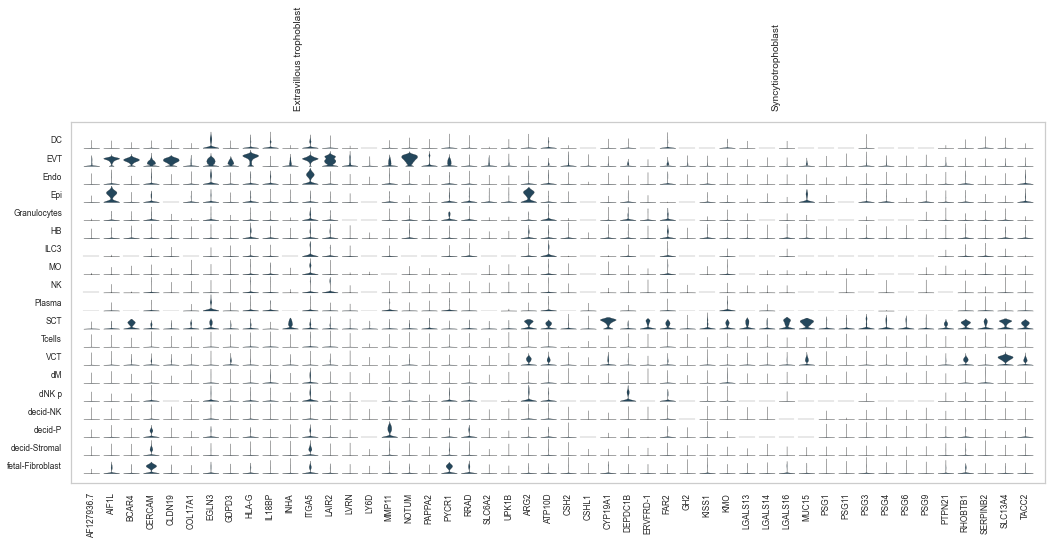

In [18]:
sc.pl.stacked_violin(placentaTiechmann, groupby = "grouped-cells", 
                     var_names = tiechIntersection, color = "#1b4965",
                     gene_symbols =  "gene")
                    #save = "tsangInTiechmann_09152021.pdf")

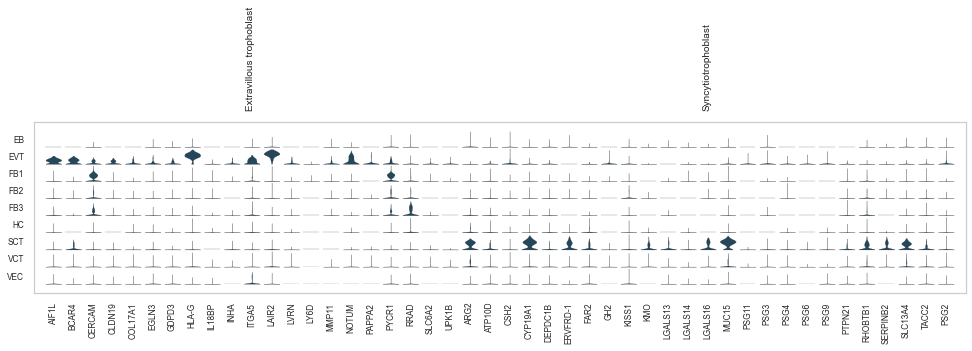

In [19]:
sc.pl.stacked_violin(placentaHemant, groupby = "ClusterName", 
                     var_names = hemantIntersection, color = "#1b4965")
                     #save = "tsangInSuryawanshi_09152021.pdf")